# TP N°1 : Regression Linéaire

Exercice1 : Model Linéaire (Régression Polynomiale : 1 variable)

In [109]:
# importation des librairies

import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [110]:
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [8,8]

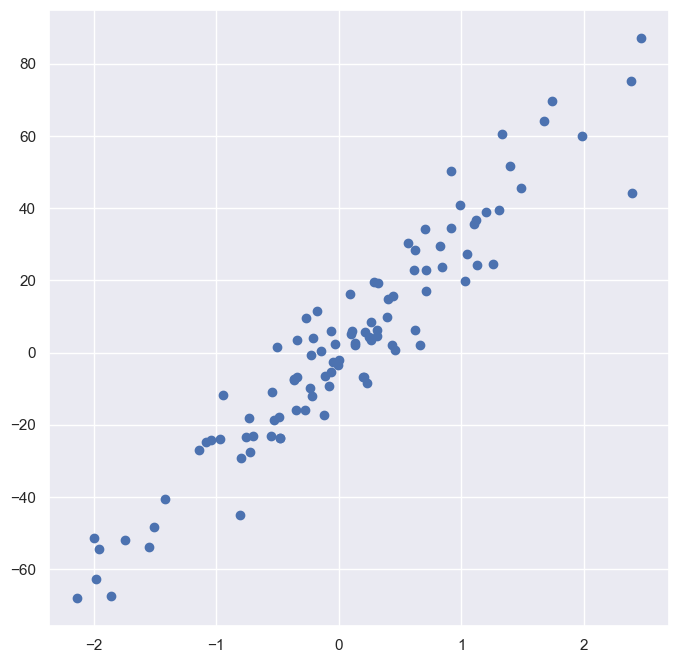

In [111]:
# creer dataset 
np.random.seed(10)
x,y = make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [112]:
# les dimensions

print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [113]:
# redimension de y

y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [114]:
# Creer le modèle
model = LinearRegression()

# Entrainer le modele
model.fit(x,y)

LinearRegression()

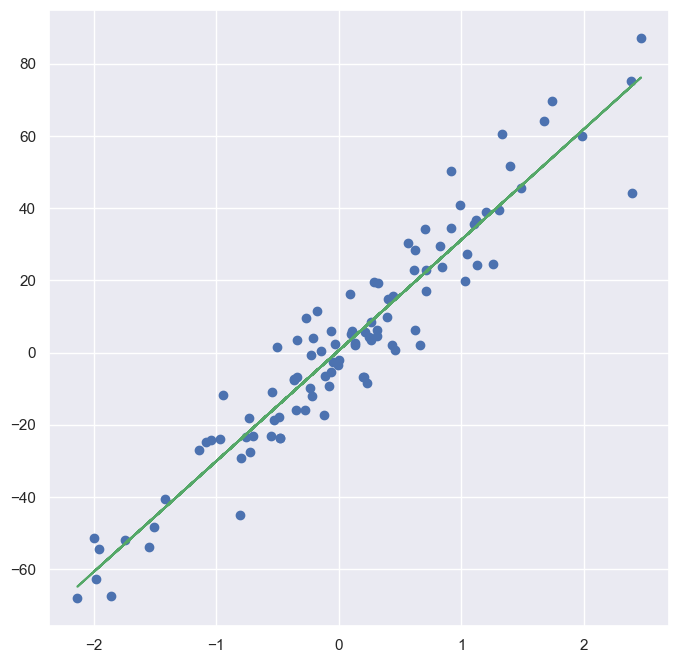

Coeff R2 = 0.9107826732646593


In [115]:
# Evaluation du modèle

y_predict = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

# score 
print('Coeff R2 =', model.score(x, y))


////////////////////////////////////////////////////////////////////////////////

Exercice 2 : Model non-linéaire (Régression Polynomiale: 1 variable)


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures


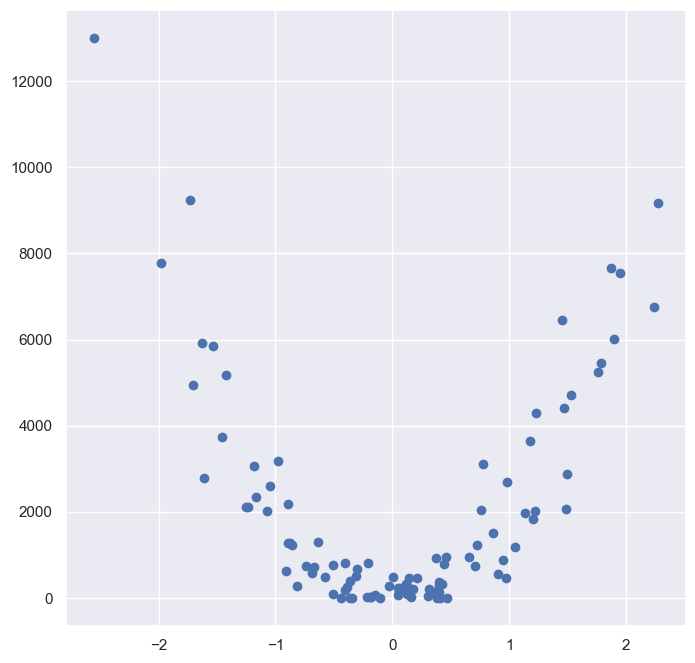

In [118]:
# Creer le dataset
np.random.seed(0) 
x, y = make_regression(n_samples=100, n_features=1, noise = 10)
y = y**2
plt.scatter(x, y) 

In [119]:
# On ajoute des variables polynômiales dans notre dataset 

poly_features = PolynomialFeatures(degree=2, include_bias=False) 
x_poly = poly_features.fit_transform(x)


In [120]:
# Creation du modèle

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

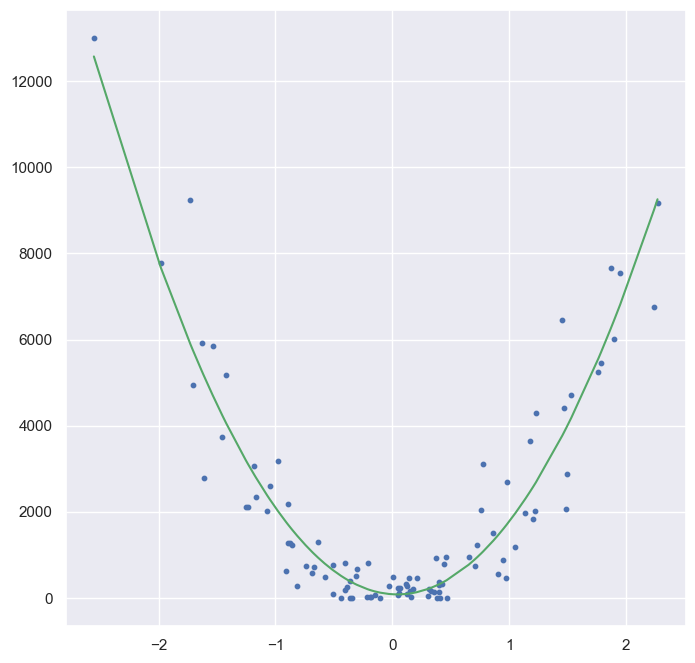

Coeff R2 = 0.8940778550495234


In [121]:
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10)

# sort the values of x before line plot

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()
print('Coeff R2 =', model.score(x_poly, y))

///////////////////////////////////////////////////////////////

Exercice 4 : Régression linéaire sur un vrai Dataset


In [155]:
# Importation des librairies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics 

In [135]:
# charger dataset 
#path='/Users/asus/Desktop/jupyter'
data = pd.read_csv('hou_all.csv', index_col=0, encoding = "ISO-8859-1")


In [138]:
data.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
crim,,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [141]:
# pretraitement des donnees 
data.zn.replace(0,np.nan,inplace = True)
data.chas.replace(0,np.nan,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 506 entries, 0.00632 to 0.04741
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zn           134 non-null    float64
 1   indus        506 non-null    float64
 2   chas         35 non-null     float64
 3   nox          506 non-null    float64
 4   rm           506 non-null    float64
 5   age          506 non-null    float64
 6   dis          506 non-null    float64
 7   rad          506 non-null    int64  
 8   tax          506 non-null    int64  
 9   ptratio      506 non-null    float64
 10  black        506 non-null    float64
 11  lstat        506 non-null    float64
 12  medv         506 non-null    float64
 13  Unnamed: 14  506 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [145]:
# supprimer les features 
data.isnull().sum()/len(data) * 100


zn             73.517787
indus           0.000000
chas           93.083004
nox             0.000000
rm              0.000000
age             0.000000
dis             0.000000
rad             0.000000
tax             0.000000
ptratio         0.000000
black           0.000000
lstat           0.000000
medv            0.000000
Unnamed: 14     0.000000
dtype: float64

In [147]:
# supprimer les colonnes  
data = data.drop(['zn','chas'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 506 entries, 0.00632 to 0.04741
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   indus        506 non-null    float64
 1   nox          506 non-null    float64
 2   rm           506 non-null    float64
 3   age          506 non-null    float64
 4   dis          506 non-null    float64
 5   rad          506 non-null    int64  
 6   tax          506 non-null    int64  
 7   ptratio      506 non-null    float64
 8   black        506 non-null    float64
 9   lstat        506 non-null    float64
 10  medv         506 non-null    float64
 11  Unnamed: 14  506 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 51.4 KB


In [148]:
data.head()

,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
crim,,,,,,,,,,,,
0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\172610152.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['medv'], bins=30)


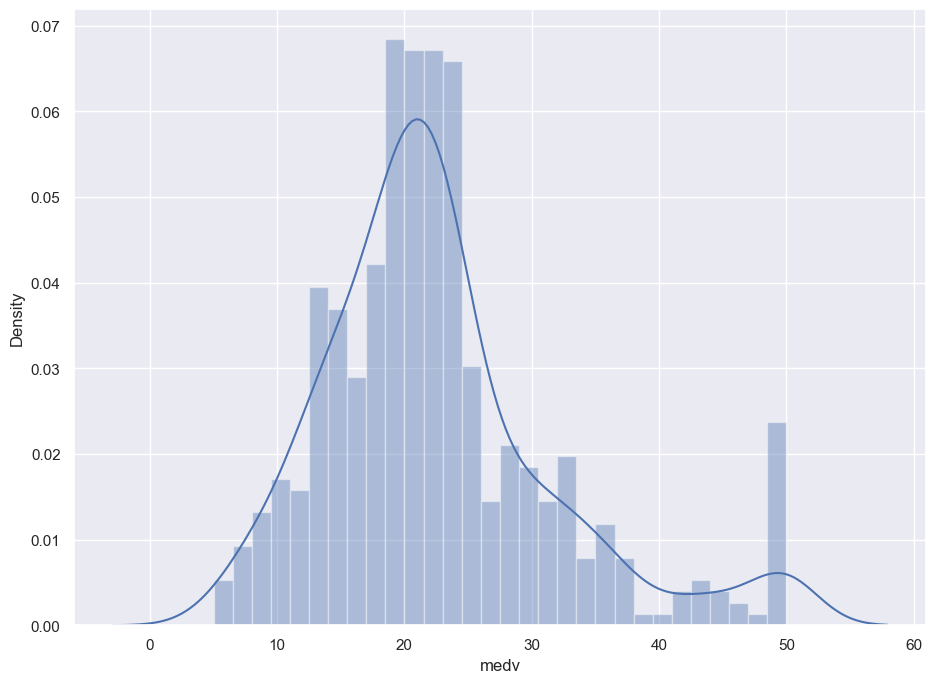

In [149]:
# Analyse des donnees

sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(data['medv'], bins=30)
plt.show()

    

<Axes: >

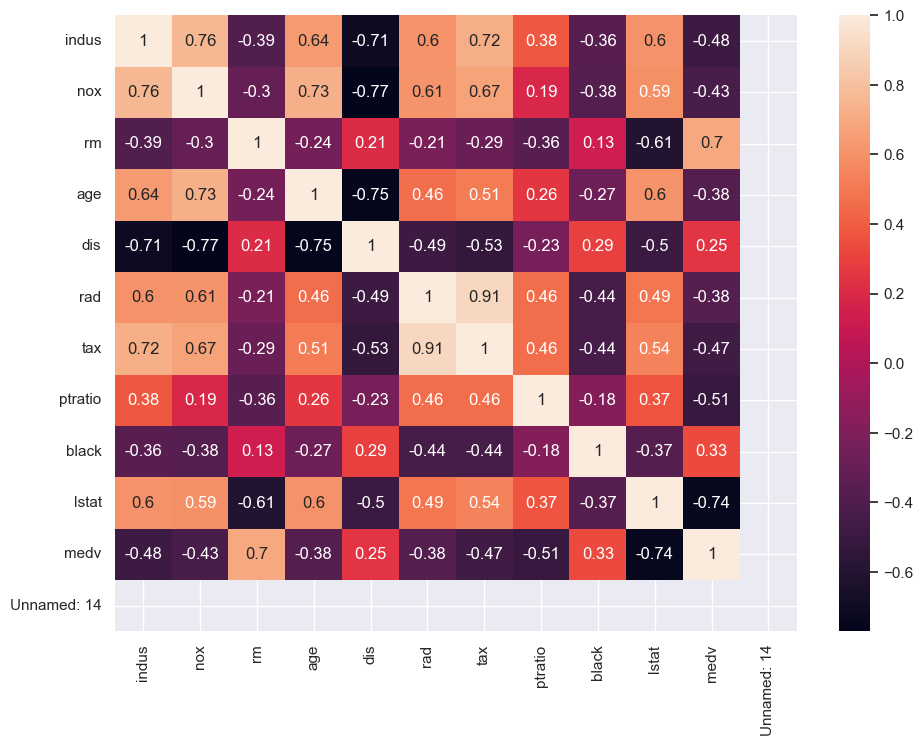

In [150]:
# Mesure les relations lineaires entre les variables

correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [153]:
# Diviser le data
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [154]:
# Creation du modèle 
model = LinearRegression()

# Entrainement du modèle
model.fit(X_train, y_train)

LinearRegression()

In [156]:
# Evaluation

y_pred = model.predict(X_test)
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))
print("r2_score:", r2_score(y_test,y_pred))


MAE 0.0
MSE 0.0
RMSE 0.0
Score: 1.0
r2_score: 1.0
